****
# Visualization in Word Cloud
****

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/DELL/Project/FreeWorks/Sentiment Analysis for Adidas and Twitter/Data Wrangling & Exploration/extracted_data/Adidas_Webscraped_Twitter.csv")
data.head()

Tweets                  location
0  🚨🚨🚨 Steal of the Day 🚨🚨🚨\n\nAdidas Hamburg Red...  The Casuals Directory HQ
1   ADIDAS YEEZY 500 'ENFLAME'\n\nLAUNCHING ON MA...                    Canada
2  My  Road to Glory concepts.\nBack on FIFA 16 I...                       NaN
3   VENDO\n\nZapatillas  Adidas  RivalryRM\n\ns/....          Los Olivos, Peru
4  Zapatillas Adidas Rivalry RM\n\ns/.260\n\nus 8...          Los Olivos, Peru

In [3]:
data2 = pd.read_csv("C:/Users/DELL/Project/FreeWorks/Sentiment Analysis for Adidas and Twitter/Data Wrangling & Exploration/nike_tweets.csv",
                   index_col=[0])
data2.head()

tweet_created_at             user_name  \
0  Fri Sep 07 16:25:06 +0000 2018       Ultra YOU Woman   
1  Fri Sep 07 16:24:59 +0000 2018  Yung Cut Up (Videos)   
2  Fri Sep 07 16:24:50 +0000 2018          Rachel Bogle   
3  Fri Sep 07 16:24:44 +0000 2018      Ervin Youngblood   
4  Fri Sep 07 16:24:39 +0000 2018      NoLuckNeeded.com   

                    user_location  \
0                 California, USA   
1                  Miami, Florida   
2                Indianapolis, IN   
3  Tennessee by way of New Jersey   
4                     Gambleville   

                                    user_description user_following  \
0  I share tips to achieve your health goals and ...          False   
1  All Business inquiries contact cluuxx@gmail.co...          False   
2  Morning Traffic Reporter @CBS4Indy | Traffic A...          False   
3  Christ-Family-Career.. \rNY\nGiants, Mets, 76e...          False   
4  https://t.co/Lnr5uRql8x is a Friendly Online G...          False   

   user_friends_count  user_followers_count user_following.1  \
0             48721.0               57983.0            False   
1              5489.0               13241.0            False   
2              2386.0               11377.0            False   
3               965.0                 218.0            False   
4             13629.0               13731.0            False   

                                     tweet_full_text  user_default_profile  
0  Done is better than perfect. — Sheryl Sandberg...                  True  
1  Shout out to the Great Fire Department and the...                 False  
2  There are some AMAZINGLY hilarious Nike Ad mem...                 False  
3  #kapernickeffect #swoosh #justdoit @ Lucas Bis...                  True  
4  One Hand, One Dream: The Shaquem Griffin Story...                 False

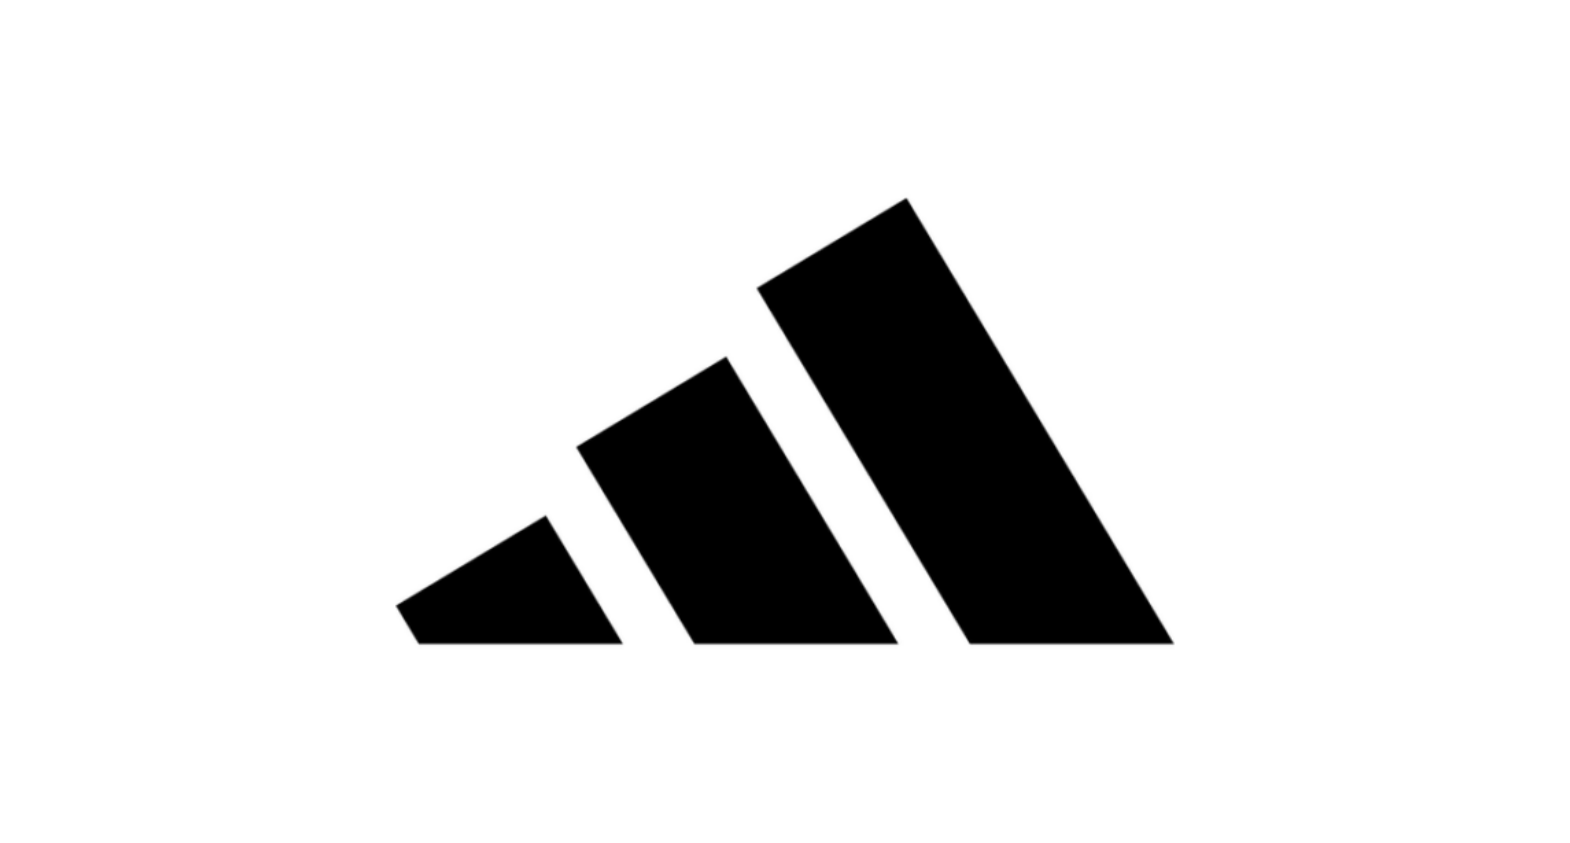

In [4]:

#Importing Adidas image 
adidas_logo = np.array(Image.open("adidas_logo.png")) 

fig = plt.figure(figsize=(20,20))

plt.imshow(adidas_logo, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

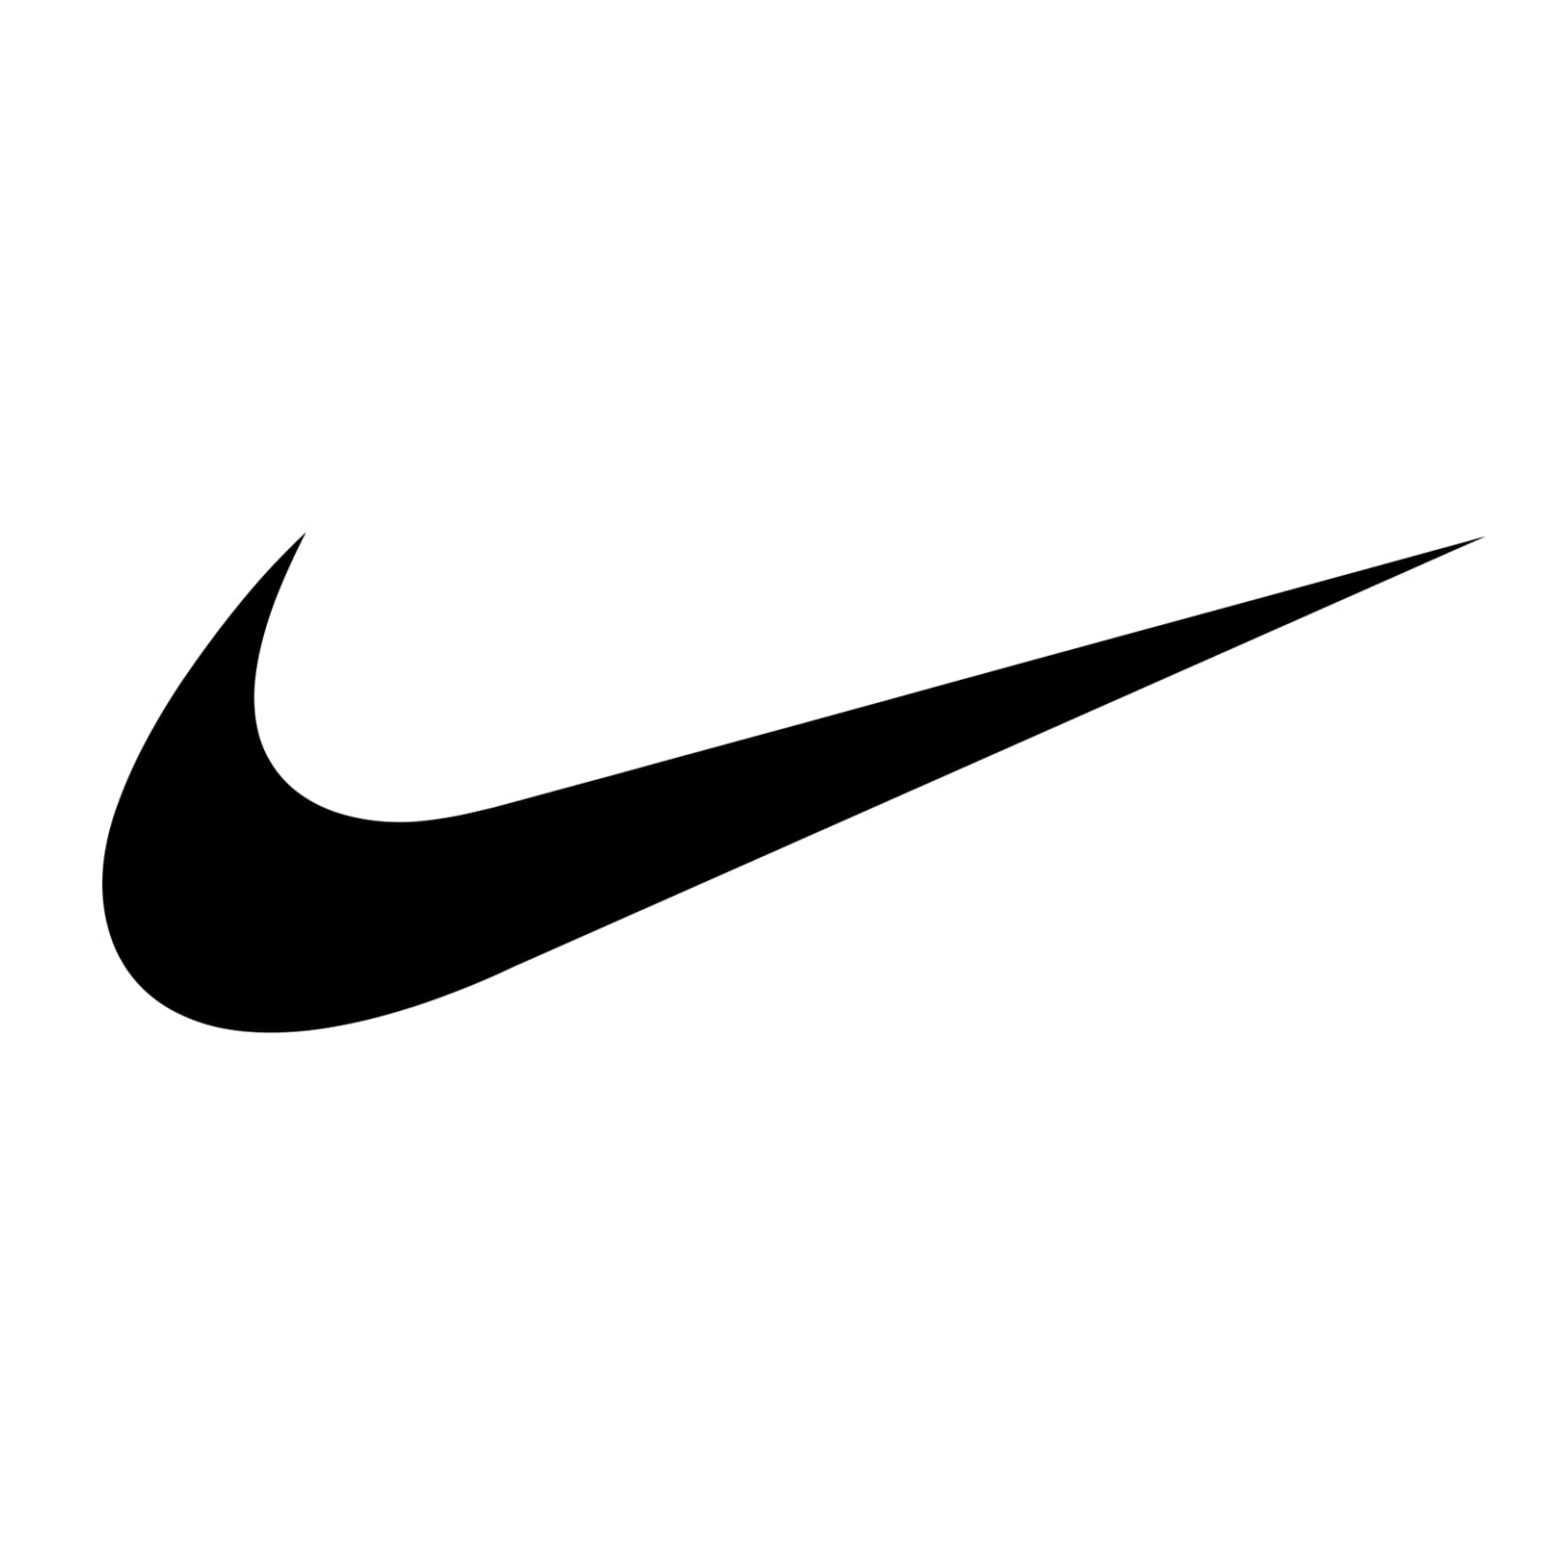

In [5]:
#Importing Adidas image 
nike_logo = np.array(Image.open("nike_logo.jpg")) 

fig = plt.figure(figsize=(20,20))

plt.imshow(nike_logo, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

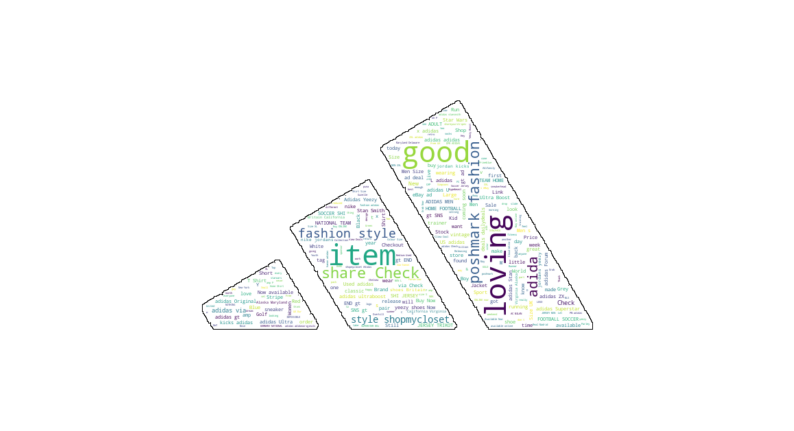

In [6]:
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords

allWords = ' '.join([tweets for tweets in data['Tweets']])

# instantiate a word cloud object
wordCloud = WordCloud(background_color='white',
                      max_words=10000,
                      mask=adidas_logo,
                      contour_width=1,
                      contour_color='black')

# generate the word cloud
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure(figsize=(10,10))

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
def show_wordcloud(data, stylish=False, logo=None):
    if stylish:
        allWords = ' '.join([tweets for tweets in data])

        wordCloud = WordCloud(background_color='white',
                              max_words=10000,
                              mask=logo,
                              contour_width=1,
                              contour_color='black')
        wordCloud.generate(allWords)
        fig = plt.figure(figsize=(10,10))

        plt.imshow(wordCloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
    else:
        allWords = ' '.join([str(tweets) for tweets in data])
        wordCloud = WordCloud(background_color='white',
                              max_words=10000,
                              contour_width=1,
                              contour_color='black')

        # generate the word cloud
        wordCloud.generate(allWords)

        # display the word cloud
        fig = plt.figure(figsize=(20,20))

        plt.imshow(wordCloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

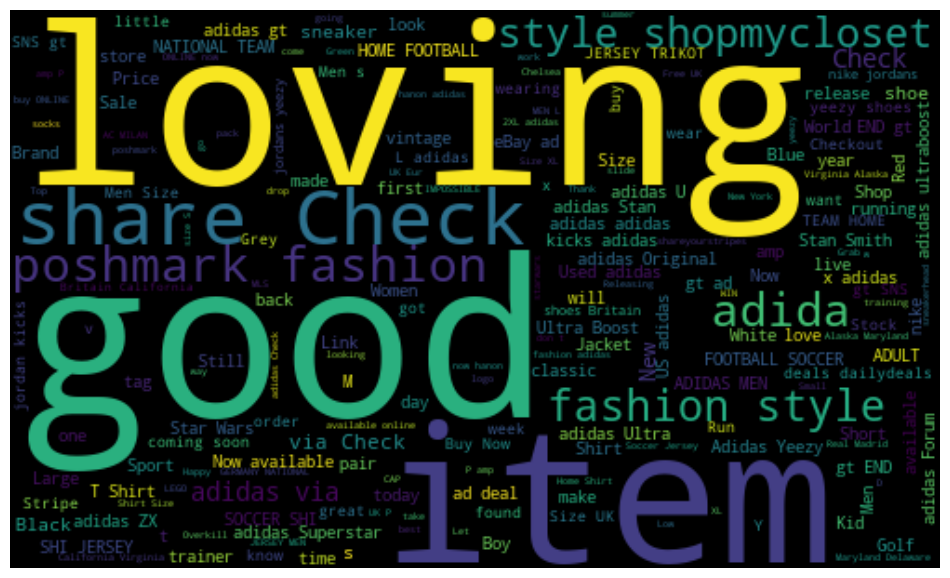

In [8]:
allWords = ' '.join([tweets for tweets in data['Tweets']])

stopwords = set(STOPWORDS)
wordCloud = WordCloud(width=500,
                      height=300,
                      random_state =21,
                      max_font_size=119,
                      stopwords=stopwords).generate(allWords)

fig = plt.figure(figsize=(12, 12))

# display the cloud
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
data.to_csv("adidas_tweets.csv")

In [10]:
data2.columns

Index(['tweet_created_at', 'user_name', 'user_location', 'user_description',
       'user_following', 'user_friends_count', 'user_followers_count',
       'user_following.1', 'tweet_full_text', 'user_default_profile'],
      dtype='object')

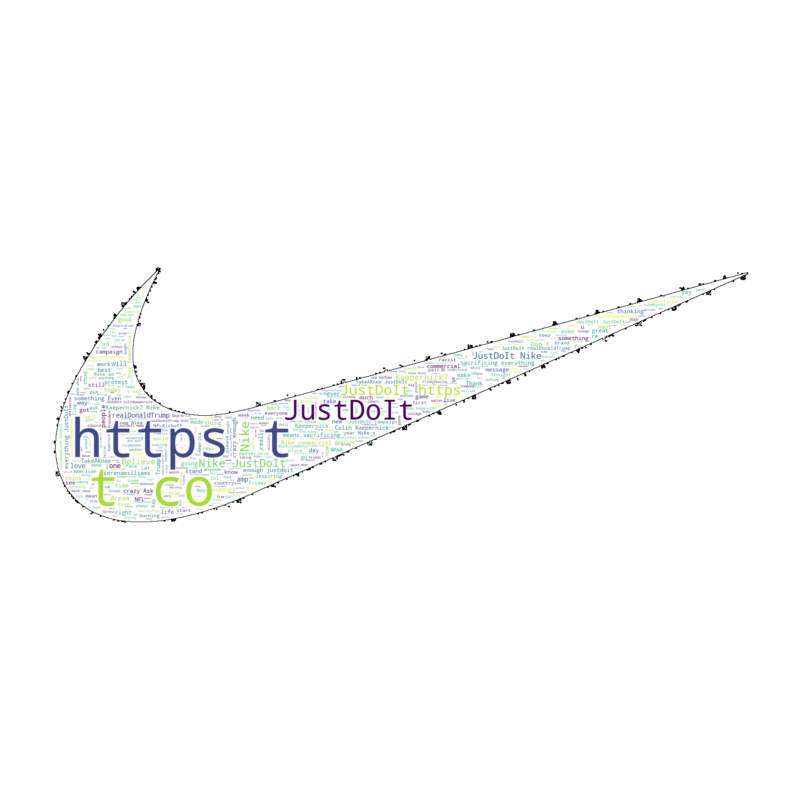

In [11]:
allWords = ' '.join([tweets for tweets in data2['tweet_full_text']])

# instantiate a word cloud object
wordCloud = WordCloud(background_color='white',
                      max_words=10000,
                      mask=nike_logo,
                      contour_width=1,
                      contour_color='black')

# generate the word cloud
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure(figsize=(10,10))

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [13]:

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove special characters, numbers, and punctuation
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(tweet)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and len(word) > 1]
    
    return ' '.join(filtered_words)

data2["Tweets"] = data2['tweet_full_text'].apply(clean_tweet)

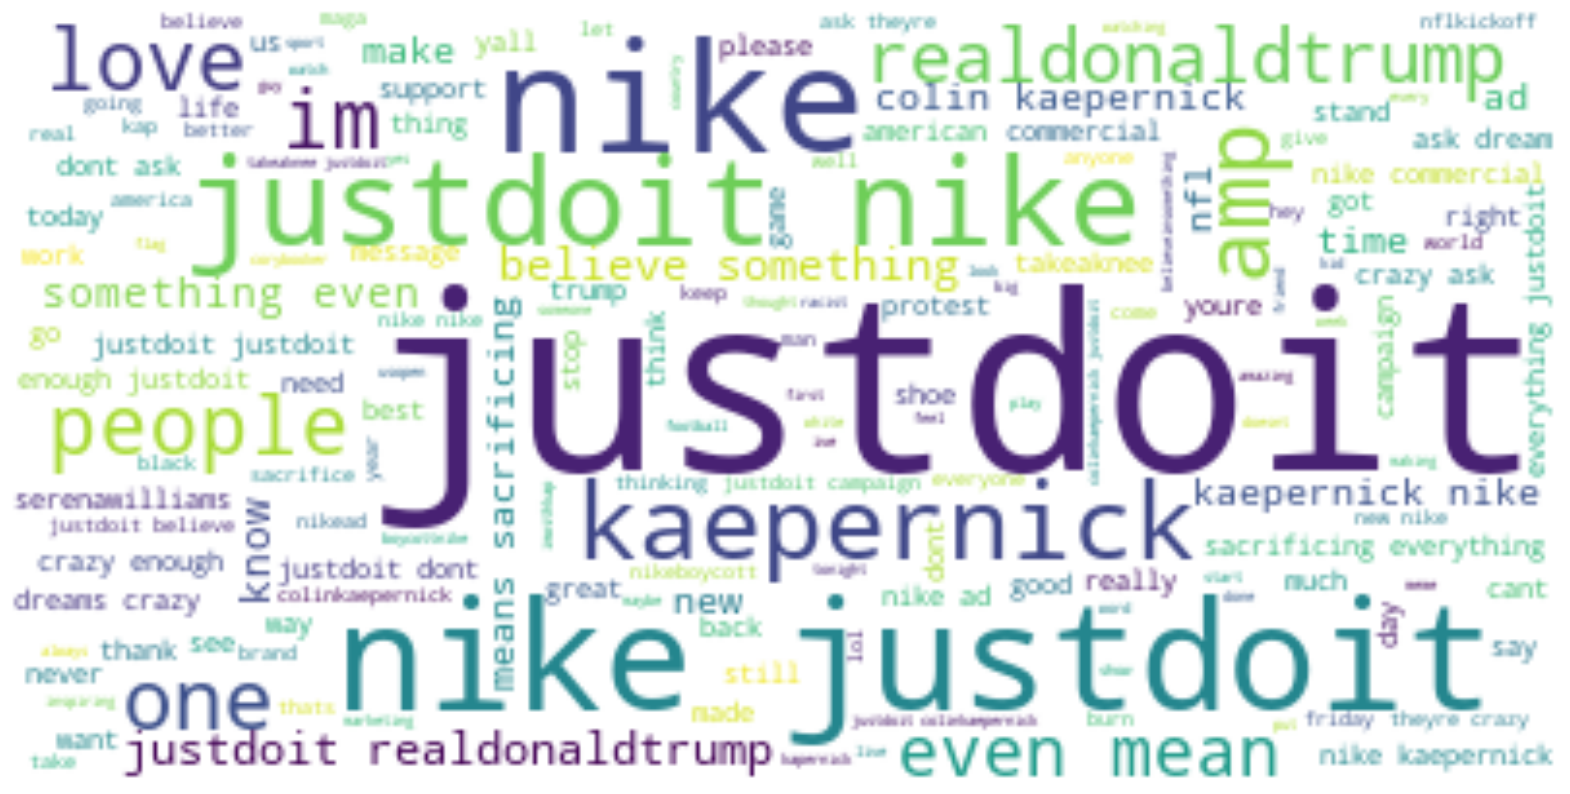

In [14]:
allWords = ' '.join([tweets for tweets in data2['Tweets']])

# instantiate a word cloud object
wordCloud = WordCloud(background_color='white',
                      max_words=10000,
                      contour_width=1,
                      contour_color='black')

# generate the word cloud
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure(figsize=(20,20))

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
data2["Tweets"]

0       done better perfect sheryl sandberg quote moti...
1       shout great fire department tour much love nyc...
2       amazingly hilarious nike ad memes happening ne...
3       kapernickeffect swoosh justdoit lucas bishops ...
4       one hand one dream shaquem griffin story shaqu...
                              ...                        
5084                                        need justdoit
5085    even best take mgk rapdevil justdoit neverback...
5086    serena serena last games youre watching feel s...
5087          serenawilliams usopen tearing tutu justdoit
5088    wow nike justdoit add played game actually gav...
Name: Tweets, Length: 5089, dtype: object

In [16]:
#save data2....version with removed noise
data2.to_csv("nike_tweets.csv")

In [17]:
data3 = pd.read_csv("C:/Users/DELL/Project/FreeWorks/Sentiment Analysis for Adidas and Twitter/Sentiment Analysis App/adidas_data_15-09-2023.csv",
                   index_col=[0])
data3.head()

Title  Price  ColoursAvailable                        ReviewTopic  \
0  Samba OG Shoes    100                 6                 Nice quality shoes   
1  Samba OG Shoes    100                 6                         Nice shoes   
2  Samba OG Shoes    100                 6                     Buy the shoes!   
3  Samba OG Shoes    100                 6  ALL GOODS SOLID! WORTH THE PRICE!   
4  Samba OG Shoes    100                 6                 Never out of style   

                                             Reviews      UserID  \
0  They match practically with  any outfit that I...   abdubs35    
1  Very nice shoes , just not as green as the pic...     THEMAN    
2  Bang on trend, comfy and cool. Would recommend...     Huggsy    
3  THAT WAS DOPE! medyo mahaba lng ng very little...  TOYOTABOY    
4  Love how light on your feet they are and comfo...    SangeBo    

                   Date  VerifiedPurchaser  IncentivizedReview  
0    September 13, 2023              False               False  
1   September 13, 2023               False                True  
2   September 12, 2023                True                True  
3    September 12, 2023              False               False  
4    September 12, 2023              False               False

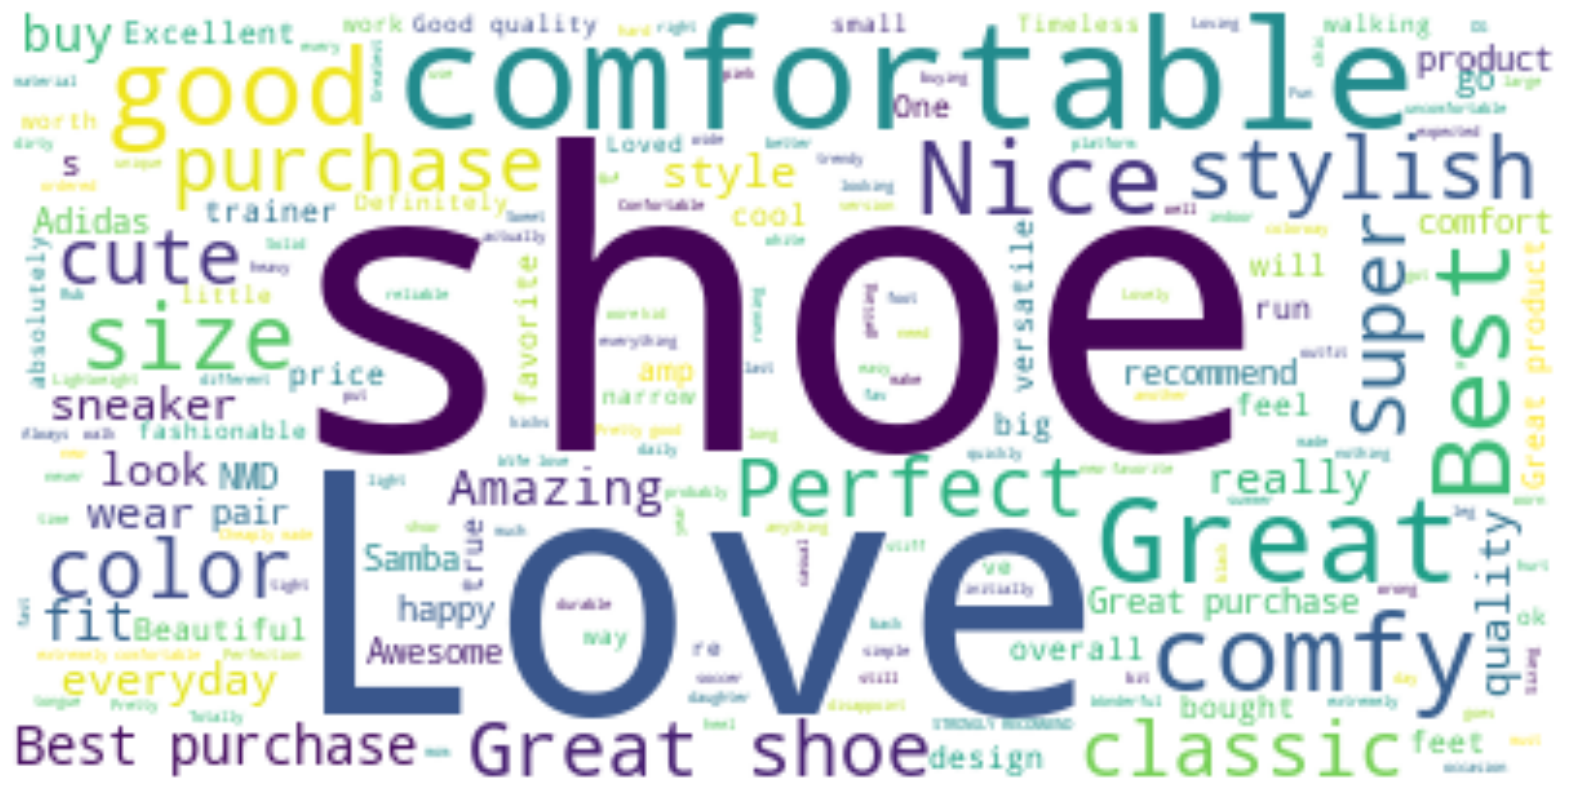

In [18]:
allWords = ' '.join([str(tweets) for tweets in data3['ReviewTopic']])

# instantiate a word cloud object
wordCloud = WordCloud(background_color='white',
                      max_words=10000,
                      contour_width=1,
                      contour_color='black')

# generate the word cloud
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure(figsize=(20,20))

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

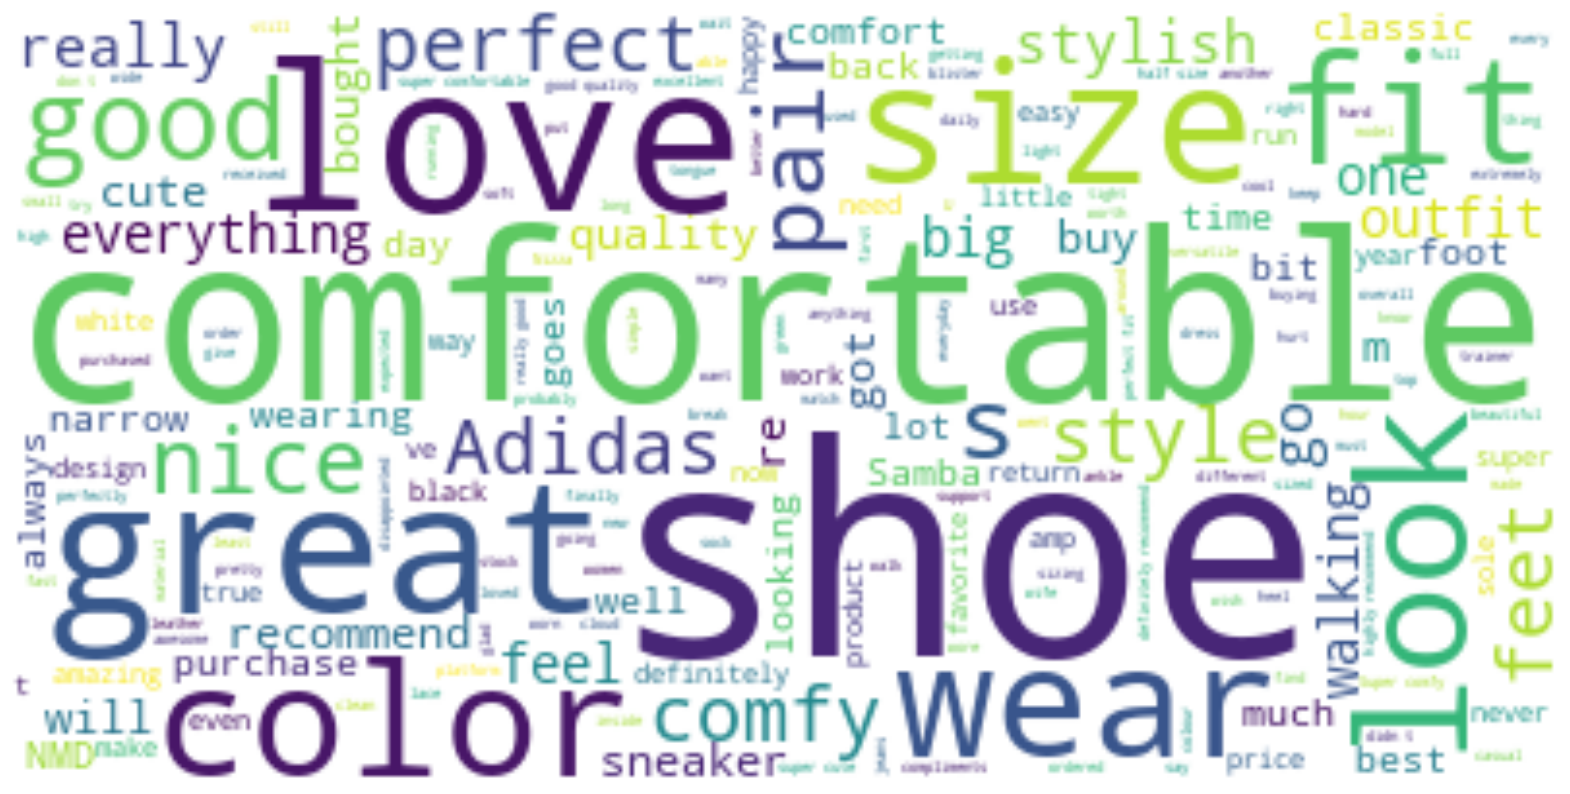

In [19]:
allWords = ' '.join([str(tweets) for tweets in data3['Reviews']])

# instantiate a word cloud object
wordCloud = WordCloud(background_color='white',
                      max_words=10000,
                      contour_width=1,
                      contour_color='black')

# generate the word cloud
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure(figsize=(20,20))

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
data4 = pd.read_csv("C:/Users/DELL/Project/FreeWorks/Sentiment Analysis for Adidas and Twitter/Sentiment Analysis App/nike_data_13-09-2023.csv",
                   index_col=[0])
data4.head()

Rating  Review Date Location          Username  \
0     5.0  Sep 8, 2023       US     Manny214Fresh   
1     5.0  Sep 8, 2023       US     Manny214Fresh   
2     5.0  Sep 8, 2023       US     Manny214Fresh   
3     5.0  Sep 8, 2023       US     Manny214Fresh   
4     4.0  Sep 7, 2023       US  ChardyC719344446   

                                              Review  Fit Feedback  \
0  Jordan Low 1 The delivery was on time as sched...  True to Size   
1  Jordan Low 1 The delivery was on time as sched...  True to Size   
2  Jordan Low 1 The delivery was on time as sched...  True to Size   
3  Jordan Low 1 The delivery was on time as sched...  True to Size   
4  Runs BIG Beautiful shoes, but runs BIG. I’m us...      Runs Big   

   Comfort Feedback Recommend Feedback             title  IsPromoReview  \
0  Very Comfortable                Yes  Air Jordan 1 Low          False   
1  Very Comfortable                Yes  Air Jordan 1 Low          False   
2  Very Comfortable                Yes  Air Jordan 1 Low          False   
3  Very Comfortable                Yes  Air Jordan 1 Low          False   
4           Average                Yes  Air Jordan 1 Low          False   

        subtitle                       colorDescription  fullPrice  \
0  Women's Shoes             Lucky Green/White/Aquatone        110   
1    Men's Shoes              Palomino/White/Wild Berry        110   
2    Men's Shoes  Sky J Purple/White/Sky J Light Purple        110   
3    Men's Shoes      Black/University Blue/White/Black        110   
4  Women's Shoes             Lucky Green/White/Aquatone        110   

   discounted  employeePrice  currentPrice  isLaunch         pid     label  
0        True          53.38         88.97     False  1010048667  IN_STOCK  
1        True          49.78         82.97     False  1003842468  IN_STOCK  
2       False          66.00        110.00     False  1012365345  IN_STOCK  
3       False          66.00        110.00     False  1012365344  IN_STOCK  
4        True          53.38         88.97     False  1010048667  IN_STOCK

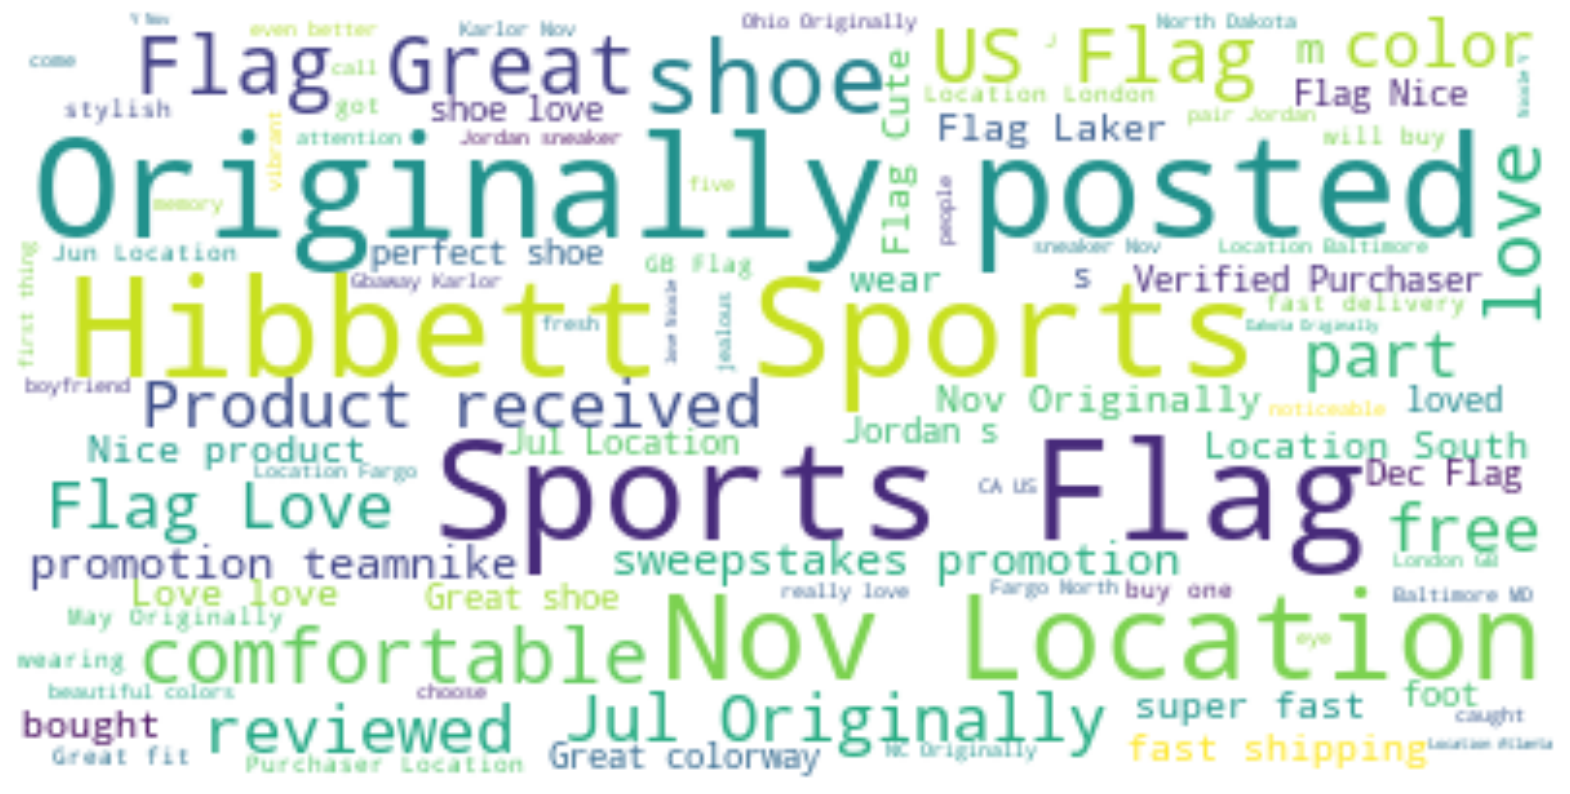

In [21]:
allWords = ' '.join([str(tweets) for tweets in data4['Review']])

# instantiate a word cloud object
wordCloud = WordCloud(background_color='white',
                      max_words=10000,
                      contour_width=1,
                      contour_color='black')

# generate the word cloud
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure(figsize=(20,20))

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet = re.sub(r'/flag', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(tweet)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and len(word) > 1]
    
    return ' '.join(filtered_words)

data4['Cleaned_Review'] = data4['Review'].apply(clean_tweet)

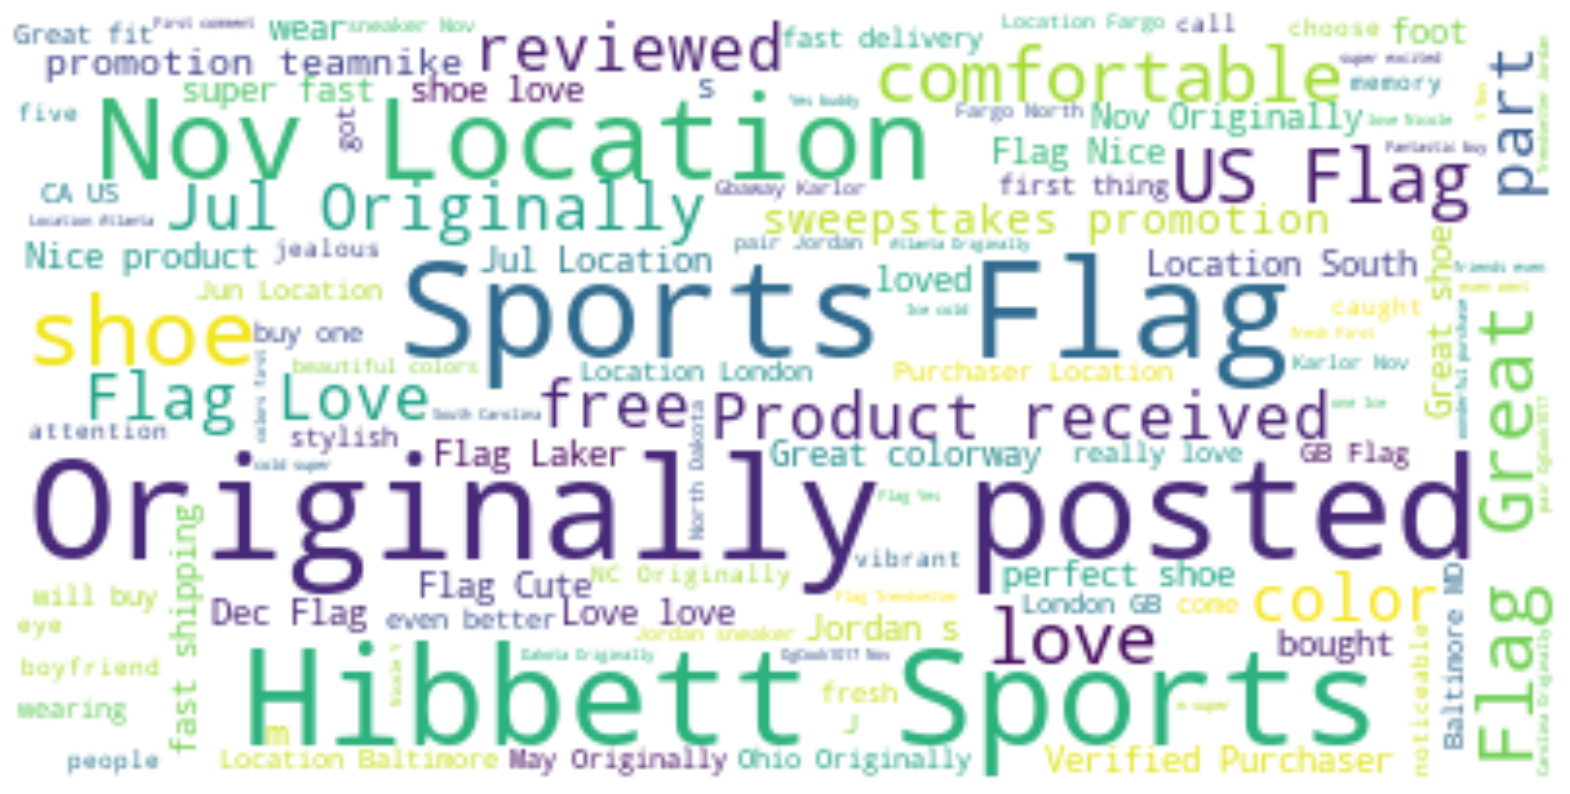

In [23]:
allWords = ' '.join([str(tweets) for tweets in data4['Review']])

# instantiate a word cloud object
wordCloud = WordCloud(background_color='white',
                      max_words=10000,
                      contour_width=1,
                      contour_color='black')

# generate the word cloud
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure(figsize=(20,20))

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()